In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Project: The Movie Database Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Explanatory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Different factors relate to the success of a movie. They may range from genre, to cast, to directors The Movie Database is a dataset that holds most of these information for analysis. From the description on Kaggle, 0 values are meant to be taken as null values but I didn't drop them.

> Likely questions to be asked include:
> - <a href="#q1">What Year had the Highest Revenue?</a>
> - <a href="#q2">Is There a Relationship Between Budget and Revenue?</a>
> - <a href="#q3">Do the Cast Influence the Revenue?</a>
> - <a href="#q4">Do the Directors Influence the Revenue?</a>

## Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matpy
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Importing the dataset
data = pd.read_csv("tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
data.shape

(10866, 21)

In [5]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
(data == 0).any()

id                      False
imdb_id                 False
popularity              False
budget                   True
revenue                  True
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                  True
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj               True
revenue_adj              True
dtype: bool

In [9]:
data.duplicated().sum()

1

From the above, I noticed that while the data was quite clean, there were still some things that needed fixing.
> 1. imdb_id
> 2. cast
> 3. director
> 4. keywords
> 5. genres
> 6. production_companies
> 7. Duplicates

And also some unrelated columns needs to be dropped.
> 1. original_title
> 2. homepage
> 3. tagline
> 4. overview

I also noticed that there some pieces of data that even though they aren't null, were equal to zero.
> 1. budget
> 2. revenue
> 3. runtime
> 4. budget_adj
> 5. revenue_adj

## Data Cleaning

**These columns are dropped because I feel they would not be necessary in the exploratory phase.**

In [10]:
# Dropping unnecessary columns
data.drop(["original_title", "homepage", "tagline", "overview"], axis = 1, inplace = True)
data.head()

,id,imdb_id,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The imdb_id column is one consisting of "unique" fields, so it would be best to drop rows with missing imdb_id's instead of trying to manipulate it.

In [11]:
data.imdb_id.unique()

array(['tt0369610', 'tt1392190', 'tt2908446', ..., 'tt0060161',
       'tt0061177', 'tt0060666'], dtype=object)

In [12]:
data.imdb_id.nunique()

10855

In [13]:
# Dropping null values based on the imdb_id column
data.dropna(subset = ["imdb_id"], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10856 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10856 non-null  float64
 3   budget                10856 non-null  int64  
 4   revenue               10856 non-null  int64  
 5   cast                  10780 non-null  object 
 6   director              10816 non-null  object 
 7   keywords              9369 non-null   object 
 8   runtime               10856 non-null  int64  
 9   genres                10835 non-null  object 
 10  production_companies  9831 non-null   object 
 11  release_date          10856 non-null  object 
 12  vote_count            10856 non-null  int64  
 13  vote_average          10856 non-null  float64
 14  release_year          10856 non-null  int64  
 15  budget_adj         

In [14]:
data[data.duplicated()]

,id,imdb_id,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [15]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

Here I'm seperating the table based on data types so that cleaning the data based on the data type would be easier, efficient and well automated

In [16]:
# Seperating columns
num = data.select_dtypes(include = [int, float])
text = data.select_dtypes(include = object)

In [17]:
num.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10855 non-null  int64  
 1   popularity    10855 non-null  float64
 2   budget        10855 non-null  int64  
 3   revenue       10855 non-null  int64  
 4   runtime       10855 non-null  int64  
 5   vote_count    10855 non-null  int64  
 6   vote_average  10855 non-null  float64
 7   release_year  10855 non-null  int64  
 8   budget_adj    10855 non-null  float64
 9   revenue_adj   10855 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 932.9 KB


In [19]:
(num == 0).any()

id              False
popularity      False
budget           True
revenue          True
runtime          True
vote_count      False
vote_average    False
release_year    False
budget_adj       True
revenue_adj      True
dtype: bool

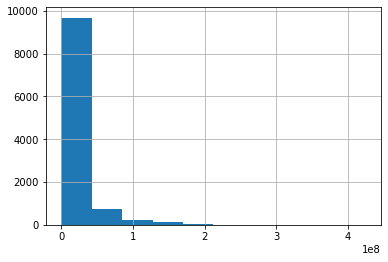

In [20]:
data["budget"].hist();

I'm going to replace all zero values with mean of each column

In [21]:
# Replacing all zero values with the mean
for i in num.columns:
    if (num[i] == 0).any() == True:
        num[i].replace(0, num[i].mean(), inplace = True)
        
(num == 0).any()

id              False
popularity      False
budget          False
revenue         False
runtime         False
vote_count      False
vote_average    False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

In [22]:
text.head()

,imdb_id,cast,director,keywords,genres,production_companies,release_date
0,tt0369610,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15
1,tt1392190,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15
2,tt2908446,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15
3,tt2488496,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15
4,tt2820852,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15


In [23]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   imdb_id               10855 non-null  object
 1   cast                  10779 non-null  object
 2   director              10815 non-null  object
 3   keywords              9368 non-null   object
 4   genres                10834 non-null  object
 5   production_companies  9830 non-null   object
 6   release_date          10855 non-null  object
dtypes: object(7)
memory usage: 678.4+ KB


In [24]:
text[text["cast"].isna()]

,imdb_id,cast,director,keywords,genres,production_companies,release_date
371,tt4661600,NaN,Sanjay Patel,NaN,Animation,Pixar Animation Studios,11/25/15
441,tt4908644,NaN,Evgeny Afineevsky,NaN,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15
465,tt4393514,NaN,Adam Curtis,manipulation|politics|war|control|fear,Documentary,BBC,1/24/15
536,tt3762974,NaN,David Gelb,mustang|car|corporation|henry ford family|car ...,Documentary,NaN,10/8/15
538,tt3983674,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,Documentary,NaN,1/1/15
...,...,...,...,...,...,...,...
9677,tt0093832,NaN,John Lasseter,NaN,Animation,Pixar Animation Studios,8/17/87
9755,tt0061402,NaN,Martin Scorsese,NaN,Drama,NaN,1/1/68
10434,tt0060984,NaN,David Lynch,student movie|short,Animation,Pensylvania Academy of Fine Arts,1/1/67
10550,tt0091455,NaN,John Lasseter,pixar animated short|luxo lamps|beach ball|fat...,Animation|Family,Pixar Animation Studios,8/17/86


In [25]:
text.mode(dropna = True)

,imdb_id,cast,director,keywords,genres,production_companies,release_date
0,tt0035423,Louis C.K.,Woody Allen,woman director,Drama,Paramount Pictures,1/1/09
1,tt0052646,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0053559,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0053580,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0053604,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10850,tt5210380,NaN,NaN,NaN,NaN,NaN,NaN
10851,tt5223342,NaN,NaN,NaN,NaN,NaN,NaN
10852,tt5227516,NaN,NaN,NaN,NaN,NaN,NaN
10853,tt5297750,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
text["cast"].mode(dropna = True)[0]

'Louis C.K.'

I'm going to replace all missing values with the mode of each column

In [27]:
# Replacing missing values with the mode
for i in text.columns:
    if data[i].isna().any() == True:
        data[i].fillna(data[i].mode()[0], inplace = True)
        
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   imdb_id               10855 non-null  object
 1   cast                  10855 non-null  object
 2   director              10855 non-null  object
 3   keywords              10855 non-null  object
 4   genres                10855 non-null  object
 5   production_companies  10855 non-null  object
 6   release_date          10855 non-null  object
dtypes: object(7)
memory usage: 678.4+ KB


In [28]:
text.isna().sum()

imdb_id                 0
cast                    0
director                0
keywords                0
genres                  0
production_companies    0
release_date            0
dtype: int64

In [29]:
text.head()

,imdb_id,cast,director,keywords,genres,production_companies,release_date
0,tt0369610,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15
1,tt1392190,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15
2,tt2908446,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15
3,tt2488496,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15
4,tt2820852,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15


In [30]:
text["cast"] = text["cast"].apply(lambda x: x.replace("|", ", "))
text["keywords"] = text["keywords"].apply(lambda x: x.replace("|", ", "))
text["genres"] = text["genres"].apply(lambda x: x.replace("|", ", "))
text["production_companies"] = text["production_companies"].apply(lambda x: x.replace("|", ", "))

In [31]:
text.head()

,imdb_id,cast,director,keywords,genres,production_companies,release_date
0,tt0369610,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...","Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15
1,tt1392190,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,"future, chase, post-apocalyptic, dystopia, aus...","Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15
2,tt2908446,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...","Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15
3,tt2488496,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,"android, spaceship, jedi, space opera, 3d","Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15
4,tt2820852,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,"car race, speed, revenge, suspense, car","Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15


In [32]:
df = pd.concat([num, text], axis = 1)
df.head(100)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,imdb_id,cast,director,keywords,genres,production_companies,release_date
0,135397,32.985763,1.500000e+08,1.513529e+09,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,tt0369610,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...","Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15
1,76341,28.419936,1.500000e+08,3.784364e+08,120.0,6185,7.1,2015,1.379999e+08,3.481613e+08,tt1392190,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,"future, chase, post-apocalyptic, dystopia, aus...","Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15
2,262500,13.112507,1.100000e+08,2.952382e+08,119.0,2480,6.3,2015,1.012000e+08,2.716190e+08,tt2908446,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...","Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15
3,140607,11.173104,2.000000e+08,2.068178e+09,136.0,5292,7.5,2015,1.839999e+08,1.902723e+09,tt2488496,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,"android, spaceship, jedi, space opera, 3d","Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15
4,168259,9.335014,1.900000e+08,1.506249e+09,137.0,2947,7.3,2015,1.747999e+08,1.385749e+09,tt2820852,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,"car race, speed, revenge, suspense, car","Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,258509,1.841779,1.463776e+07,2.337556e+08,92.0,278,5.7,2015,1.756606e+07,2.150550e+08,tt2974918,"Jason Lee, Justin Long, Bella Thorne, Matthew ...",Walt Becker,"chipmunk, cgi, talking animal, aftercreditssti...","Adventure, Animation, Comedy, Family","Regency Enterprises, Fox 2000 Pictures, Sunswe...",12/17/15
96,298382,1.823130,1.193000e+07,1.834000e+07,118.0,197,6.9,2015,1.097560e+07,1.687279e+07,tt2910904,"Kate Winslet, Liam Hemsworth, Caroline Goodall...",Jocelyn Moorhouse,"based on novel, australia, dressmaker, hometow...",Drama,"Amazon Studios, Film Art Media, Apollo Media",10/1/15
97,272693,1.758618,8.500000e+06,4.352863e+07,100.0,753,6.8,2015,7.819997e+06,4.004633e+07,tt1666801,"Mae Whitman, Robbie Amell, Bella Thorne, Bianc...",Ari Sandel,"high school, teenager, popularity, high school...","Romance, Comedy","Wonderland Sound and Vision, CBS Films, Vast E...",2/20/15
98,283445,1.742286,1.000000e+07,5.288202e+07,97.0,331,5.5,2015,9.199996e+06,4.865144e+07,tt2752772,"Shannyn Sossamon, James Ransone, Tate Ellingto...",Ciaran Foy,"haunted house, sequel, twins",Horror,"Alliance Films, Blumhouse Productions, IM Glob...",8/19/15


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10855 non-null  int64  
 1   popularity            10855 non-null  float64
 2   budget                10855 non-null  float64
 3   revenue               10855 non-null  float64
 4   runtime               10855 non-null  float64
 5   vote_count            10855 non-null  int64  
 6   vote_average          10855 non-null  float64
 7   release_year          10855 non-null  int64  
 8   budget_adj            10855 non-null  float64
 9   revenue_adj           10855 non-null  float64
 10  imdb_id               10855 non-null  object 
 11  cast                  10855 non-null  object 
 12  director              10855 non-null  object 
 13  keywords              10855 non-null  object 
 14  genres                10855 non-null  object 
 15  production_companie

I noticed that the data type of runtime changed to float. So I'm going to change it back and also change the data type of release year.

In [34]:
df["runtime"] = df["runtime"].astype("int64")
df["release_year"] = df["release_year"].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10855 non-null  int64  
 1   popularity            10855 non-null  float64
 2   budget                10855 non-null  float64
 3   revenue               10855 non-null  float64
 4   runtime               10855 non-null  int64  
 5   vote_count            10855 non-null  int64  
 6   vote_average          10855 non-null  float64
 7   release_year          10855 non-null  object 
 8   budget_adj            10855 non-null  float64
 9   revenue_adj           10855 non-null  float64
 10  imdb_id               10855 non-null  object 
 11  cast                  10855 non-null  object 
 12  director              10855 non-null  object 
 13  keywords              10855 non-null  object 
 14  genres                10855 non-null  object 
 15  production_companie

In [35]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10855.000000,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
mean,65959.191617,0.646832,2.230657e+07,6.191985e+07,102.396499,217.584155,5.973865,2.676903e+07,7.986464e+07
std,92018.246342,1.000591,2.802313e+07,1.110686e+08,30.868790,575.877532,0.934604,3.051933e+07,1.366194e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,10591.500000,0.207732,1.463776e+07,3.986359e+07,90.000000,17.000000,5.400000,1.756606e+07,5.141632e+07
50%,20618.000000,0.383998,1.463776e+07,3.986359e+07,99.000000,38.000000,6.000000,1.756606e+07,5.141632e+07
75%,75393.500000,0.714446,1.500000e+07,3.986359e+07,111.000000,146.000000,6.600000,2.085325e+07,5.141632e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


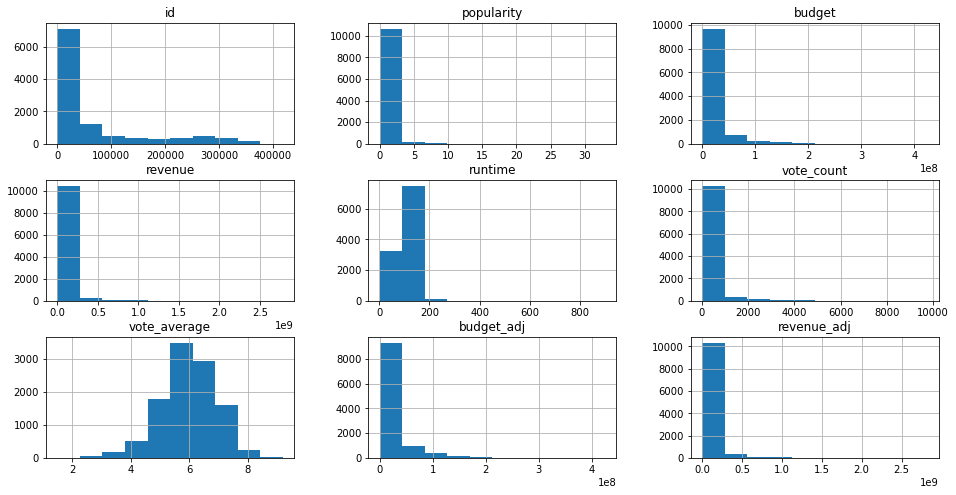

In [36]:
df.hist(figsize = (16, 8));

<a id='eda'></a>
## Explanatory Data Analysis

<a id='q1'></a>
### Q1: What Year had the Highest Revenue?

In [37]:
df.groupby("release_year")["revenue"].sum()

release_year
1960    1.141595e+09
1961    1.174855e+09
1962    1.132442e+09
1963    1.263722e+09
1964    1.696344e+09
1965    1.653989e+09
1966    1.719144e+09
1967    1.774288e+09
1968    1.341050e+09
1969    1.280410e+09
1970    1.676402e+09
1971    2.039318e+09
1972    1.690638e+09
1973    2.738797e+09
1974    2.008447e+09
1975    2.113534e+09
1976    2.036777e+09
1977    3.496081e+09
1978    3.004187e+09
1979    2.880702e+09
1980    3.323342e+09
1981    3.448877e+09
1982    4.092851e+09
1983    3.423710e+09
1984    4.708431e+09
1985    4.550043e+09
1986    4.796640e+09
1987    5.574875e+09
1988    6.290820e+09
1989    7.556739e+09
1990    7.507664e+09
1991    7.218006e+09
1992    8.111196e+09
1993    9.745602e+09
1994    1.096220e+10
1995    1.214611e+10
1996    1.229785e+10
1997    1.404358e+10
1998    1.363899e+10
1999    1.558125e+10
2000    1.560288e+10
2001    1.795453e+10
2002    1.970629e+10
2003    2.079887e+10
2004    2.249432e+10
2005    2.369228e+10
2006    2.432818e+10


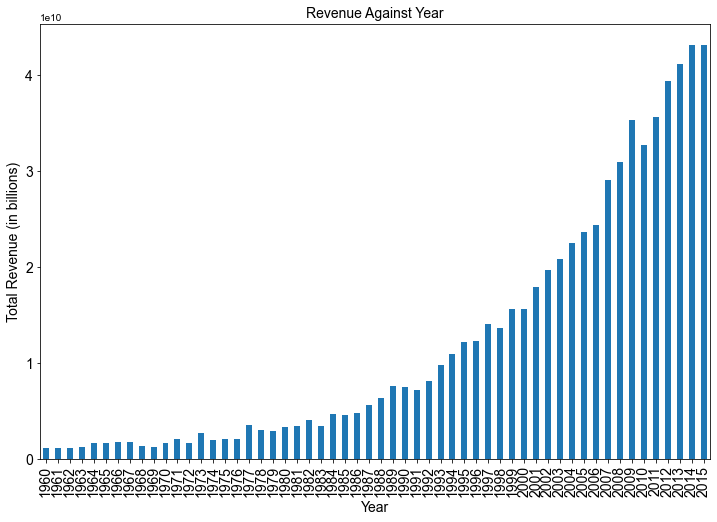

In [38]:
matpy.title("Revenue Against Year", fontsize = 14)
df.groupby("release_year")["revenue"].sum().plot(kind = "bar", figsize = (12, 8));

matpy.xlabel("Year", fontsize = 14)
matpy.xticks(fontsize = 14)
matpy.ylabel("Total Revenue (in billions)", fontsize = 14)
matpy.yticks(fontsize = 14)
sb.set_style("dark")

From the above we can observe that between 2014 and 2015 had the highest revenue. I also want to check if there is any relationship between the budget and the revenue.

<a id='q2'></a>
### Q2: Is There a Relationship Between Budget and Revenue?

In [39]:
df[["release_year", "budget", "revenue"]]

,release_year,budget,revenue
0,2015,1.500000e+08,1.513529e+09
1,2015,1.500000e+08,3.784364e+08
2,2015,1.100000e+08,2.952382e+08
3,2015,2.000000e+08,2.068178e+09
4,2015,1.900000e+08,1.506249e+09
...,...,...,...
10861,1966,1.463776e+07,3.986359e+07
10862,1966,1.463776e+07,3.986359e+07
10863,1966,1.463776e+07,3.986359e+07
10864,1966,1.463776e+07,3.986359e+07


In [40]:
budget_revenue = df.groupby("release_year")[["budget", "revenue"]].sum()
budget_revenue

,budget,revenue
release_year,,
1960,3.587254e+08,1.141595e+09
1961,3.096167e+08,1.174855e+09
1962,3.182018e+08,1.132442e+09
1963,4.099999e+08,1.263722e+09
1964,4.932537e+08,1.696344e+09
1965,4.215113e+08,1.653989e+09
1966,5.552386e+08,1.719144e+09
1967,4.226829e+08,1.774288e+09
1968,4.232452e+08,1.341050e+09


In [41]:
corr = df["budget"].corr(df["revenue"])
corr

0.7054170865624173

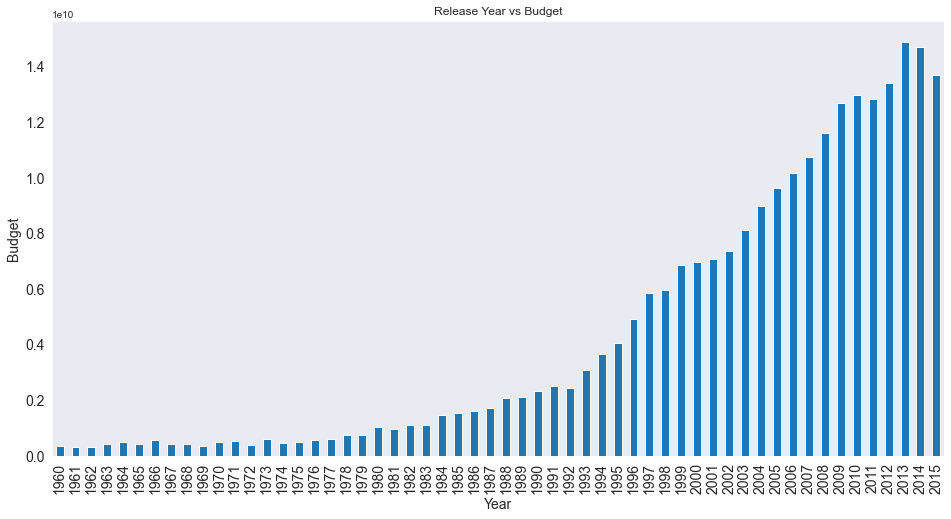

In [42]:
df.groupby("release_year")["budget"].sum().plot(kind = "bar", figsize = (16, 8), title = "Release Year vs Budget")

matpy.xlabel("Year", fontsize = 14)
matpy.xticks(fontsize = 14)
matpy.ylabel("Budget", fontsize = 14)
matpy.yticks(fontsize = 14);

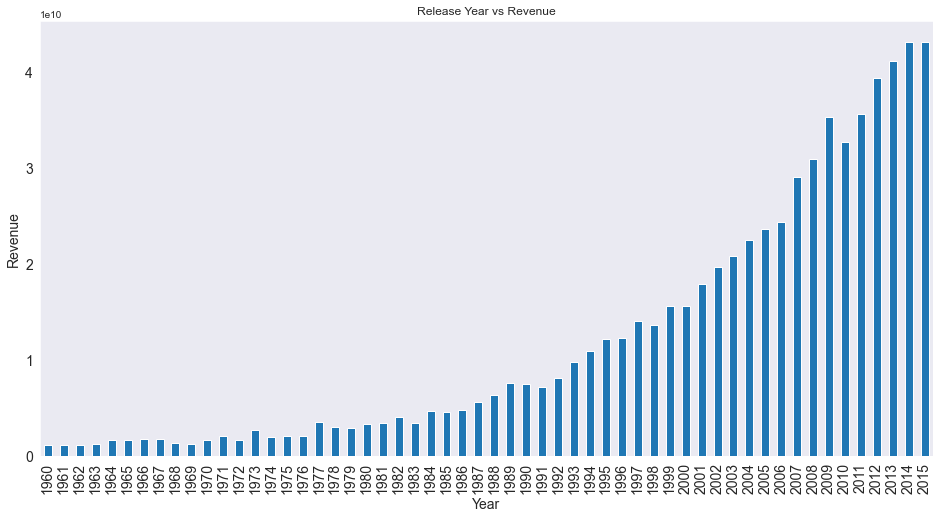

In [43]:
df.groupby("release_year")["revenue"].sum().plot(kind = "bar", figsize = (16, 8), title = "Release Year vs Revenue")

matpy.xlabel("Year", fontsize = 14)
matpy.xticks(fontsize = 14)
matpy.ylabel("Revenue", fontsize = 14)
matpy.yticks(fontsize = 14);

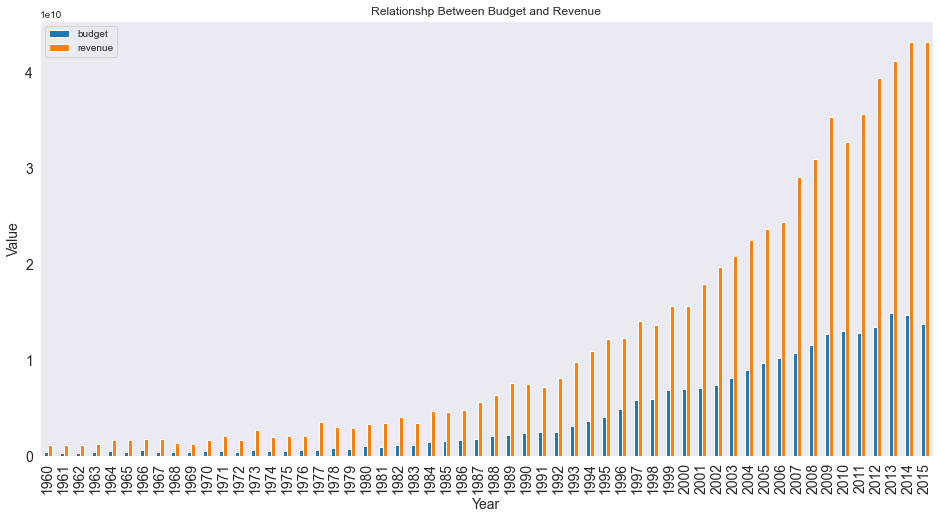

In [44]:
budget_revenue.plot(kind = "bar", figsize = (16, 8), title = "Relationshp Between Budget and Revenue")

matpy.xlabel("Year", fontsize = 14)
matpy.xticks(fontsize = 14)
matpy.ylabel("Value", fontsize = 14)
matpy.yticks(fontsize = 14);

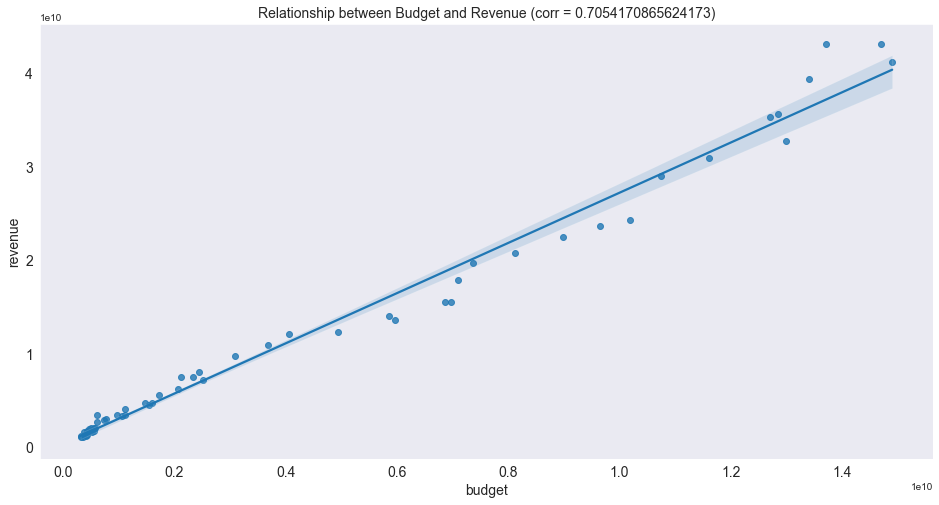

In [45]:
matpy.figure(figsize = (16, 8))
matpy.title(f"Relationship between Budget and Revenue (corr = {corr})", fontsize = 14)

matpy.xlabel("Budget (in billions)", fontsize = 14)
matpy.xticks(fontsize = 14)
matpy.ylabel("Revenue (in billions)", fontsize = 14)
matpy.yticks(fontsize = 14)

sb.regplot(data = budget_revenue, x = "budget", y = "revenue")
matpy.show()

We can clearly see there is a highly positive correlation between the budget and the revenue.

<a id='q3'></a>
### Q3: Do the Cast Influence the  Revenue?

In [46]:
df.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,imdb_id,cast,director,keywords,genres,production_companies,release_date
0,135397,32.985763,150000000.0,1.513529e+09,124,5562,6.5,2015,1.379999e+08,1.392446e+09,tt0369610,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...","Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15
1,76341,28.419936,150000000.0,3.784364e+08,120,6185,7.1,2015,1.379999e+08,3.481613e+08,tt1392190,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,"future, chase, post-apocalyptic, dystopia, aus...","Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15
2,262500,13.112507,110000000.0,2.952382e+08,119,2480,6.3,2015,1.012000e+08,2.716190e+08,tt2908446,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...","Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15
3,140607,11.173104,200000000.0,2.068178e+09,136,5292,7.5,2015,1.839999e+08,1.902723e+09,tt2488496,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,"android, spaceship, jedi, space opera, 3d","Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15
4,168259,9.335014,190000000.0,1.506249e+09,137,2947,7.3,2015,1.747999e+08,1.385749e+09,tt2820852,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,"car race, speed, revenge, suspense, car","Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15


In [47]:
cast_df = df[["cast", "revenue"]]
cast_df.head()

,cast,revenue
0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",1.513529e+09
1,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",3.784364e+08
2,"Shailene Woodley, Theo James, Kate Winslet, An...",2.952382e+08
3,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",2.068178e+09
4,"Vin Diesel, Paul Walker, Jason Statham, Michel...",1.506249e+09


In [48]:
cast_df['cast'].value_counts()

Louis C.K.                                                                       82
William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan, George Takei       5
Bill Burr                                                                         4
George Carlin                                                                     3
Pierre Coffin                                                                     3
                                                                                 ..
Freida Pinto, Riz Ahmed, Roshan Seth, Kalki Koechlin, Anurag Kashyap              1
William Hurt, Paul Giamatti, James Woods, Billy Crudup, Topher Grace              1
Dennis Quaid, Tony Oller, Aimee Teegarden, Stephen Lunsford, Devon Werkheiser     1
Kaya Scodelario, James Northcote, Amy Wren, Nichola Burley, Steve Evets           1
Harold P. Warren, Tom Neyman, John Reynolds, Diane Mahree, Stephanie Nielson      1
Name: cast, Length: 10710, dtype: int64

In [49]:
cast_df.groupby("cast")["revenue"].sum()

cast
"Weird Al" Yankovic, Victoria Jackson, Michael Richards, David Bowe, Fran Drescher                                   3.986359e+07
50 Cent, Forest Whitaker, Robert De Niro, Ryan O'Nan, Matt Gerald                                                    3.986359e+07
50 Cent, Joy Bryant, Adewale Akinnuoye-Agbaje, Omar Benson Miller, Terrence Howard                                   4.644253e+07
50 Cent, Ryan Phillippe, Bruce Willis, James Remar, Randy Couture                                                    3.986359e+07
50 Cent, Tamer Hassan, Danny Dyer, Blake Ritson, EsmÃ© Bianco                                                        3.986359e+07
                                                                                                                         ...     
Ã“lafur Darri Ã“lafsson, JÃ³hann G. JÃ³hannsson, Thora Bjorg Helga, TheodÃ³r JÃºlÃ­usson, MarÃ­a SigurÃ°ardÃ³ttir    3.986359e+07
Ã“scar Jaenada, Michael Imperioli, Luis Gerardo MÃ©ndez, JoaquÃ­n Cosio, Teresa Ruiz 

In [50]:
cast_list = []
for n in cast_df["cast"].unique():
    v = cast_df[cast_df["cast"] == n]
    cast_list.append(v["revenue"].sum())

sum_revenue = pd.DataFrame(cast_list, columns=["sum_revenue"])
sum_revenue.head()

,sum_revenue
0,1.513529e+09
1,3.784364e+08
2,2.952382e+08
3,2.068178e+09
4,1.506249e+09


In [51]:
cast_arr = cast_df["cast"].unique()
actors = pd.DataFrame(cast_arr, columns=["actors"])

final_df = pd.concat([actors, sum_revenue], axis =1)
final_df.head(20)

,actors,sum_revenue
0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",1.513529e+09
1,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",3.784364e+08
2,"Shailene Woodley, Theo James, Kate Winslet, An...",2.952382e+08
3,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",2.068178e+09
4,"Vin Diesel, Paul Walker, Jason Statham, Michel...",1.506249e+09
5,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",5.329505e+08
6,"Arnold Schwarzenegger, Jason Clarke, Emilia Cl...",4.406035e+08
7,"Matt Damon, Jessica Chastain, Kristen Wiig, Je...",5.953803e+08
8,"Sandra Bullock, Jon Hamm, Michael Keaton, Alli...",1.156731e+09
9,"Amy Poehler, Phyllis Smith, Richard Kind, Bill...",8.537086e+08


In [52]:
# Sortig and storing the first 50 rows for visualization
sorted_final = final_df.sort_values(by = ["sum_revenue"], ascending = False)
f50 = sorted_final.head(50)

In [53]:
f50

,actors,sum_revenue
371,Louis C.K.,3.066145e+09
2594,"Elijah Wood, Ian McKellen, Viggo Mortensen, Li...",2.916545e+09
1363,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2.781506e+09
19,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2.189158e+09
3,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",2.068178e+09
625,"Martin Freeman, Ian McKellen, Richard Armitage...",1.913520e+09
5151,"Kate Winslet, Leonardo DiCaprio, Frances Fishe...",1.845034e+09
6867,"Mike Myers, Eddie Murphy, Cameron Diaz, Julie ...",1.718797e+09
4301,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",1.519558e+09
0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",1.513529e+09


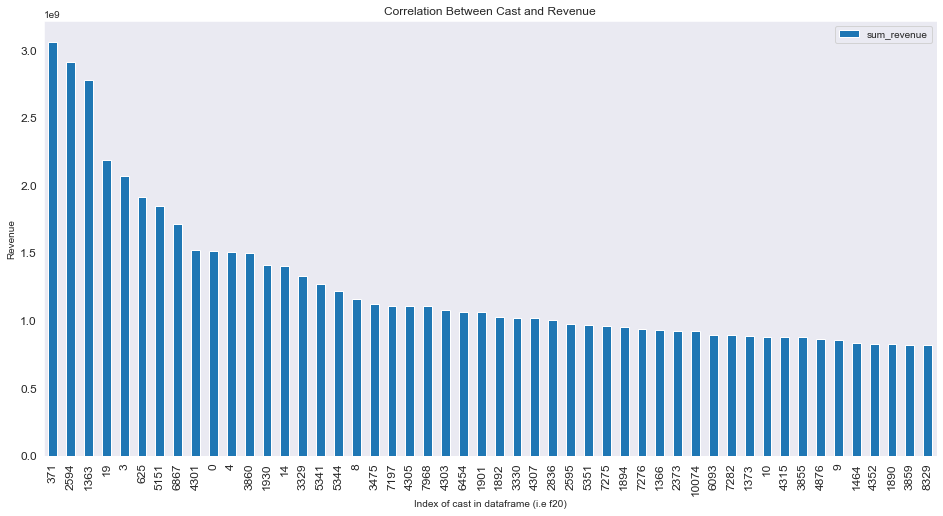

In [54]:
f50.plot(kind = "bar", figsize = (16, 8), fontsize = 12, title = "Correlation Between Cast and Revenue",
        xlabel = "Index of cast in dataframe (i.e f20)", ylabel = "Revenue");

Apart from Louis C.K., who was used to fill up null values in the cast column of the dataframe, revenue is higher for some certain actors.

<a id='q4'></a>
### Q4: Do the Directors Influence the Revenue?

In [55]:
dir_df = df[["director", "revenue"]]
dir_df.head()

,director,revenue
0,Colin Trevorrow,1.513529e+09
1,George Miller,3.784364e+08
2,Robert Schwentke,2.952382e+08
3,J.J. Abrams,2.068178e+09
4,James Wan,1.506249e+09


In [56]:
dir_df["director"].value_counts()

Woody Allen         85
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
                    ..
Baillie Walsh        1
James Honeyborne     1
Jeff Buhler          1
Gregg Bishop         1
Harold P. Warren     1
Name: director, Length: 5064, dtype: int64

In [57]:
dir_df.groupby("director")["revenue"].mean()

director
 FrÃ©dÃ©ric Jardin            3.358000e+03
A. Todd Smith                 3.986359e+07
A.R. Murugadoss               7.600000e+07
Aaron Aites                   3.986359e+07
Aaron Blaise|Robert Walker    2.500000e+02
                                  ...     
Ã‡aÄŸan Irmak                 3.986359e+07
Ã‰mile Gaudreault             3.031801e+06
Ã‰ric Besnard                 3.986359e+07
Ã‰tienne Chatiliez            3.986359e+07
Ã€lex Pastor|David Pastor     5.802422e+06
Name: revenue, Length: 5064, dtype: float64

In [58]:
dir_list = []
for n in dir_df["director"].unique():
    v = dir_df[dir_df["director"] == n]
    dir_list.append(v["revenue"].sum())

sum_revenue = pd.DataFrame(dir_list, columns=["sum_revenue"])
sum_revenue.head()

,sum_revenue
0,1.517537e+09
1,1.177964e+09
2,7.531688e+08
3,3.579170e+09
4,2.144089e+09


In [59]:
arr_dir = dir_df["director"].unique()
directors = pd.DataFrame(arr_dir, columns=["directors"])

final = pd.concat([directors, sum_revenue], axis =1)
final.head(20)

,directors,sum_revenue
0,Colin Trevorrow,1.517537e+09
1,George Miller,1.177964e+09
2,Robert Schwentke,7.531688e+08
3,J.J. Abrams,3.579170e+09
4,James Wan,2.144089e+09
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,8.319236e+08
6,Alan Taylor,9.203685e+08
7,Ridley Scott,3.689860e+09
8,Kyle Balda|Pierre Coffin,1.156731e+09
9,Pete Docter,8.537086e+08


In [60]:
sort = final.sort_values(by = ["sum_revenue"], ascending = False)
s20 = sort.head(20)
s20

,directors,sum_revenue
33,Steven Spielberg,9.098291e+09
615,Peter Jackson,6.602972e+09
1272,James Cameron,5.921622e+09
627,Michael Bay,4.917208e+09
611,Christopher Nolan,4.247276e+09
1274,David Yates,4.194159e+09
83,Robert Zemeckis,3.949418e+09
13,Chris Columbus,3.931219e+09
701,Tim Burton,3.785005e+09
7,Ridley Scott,3.689860e+09


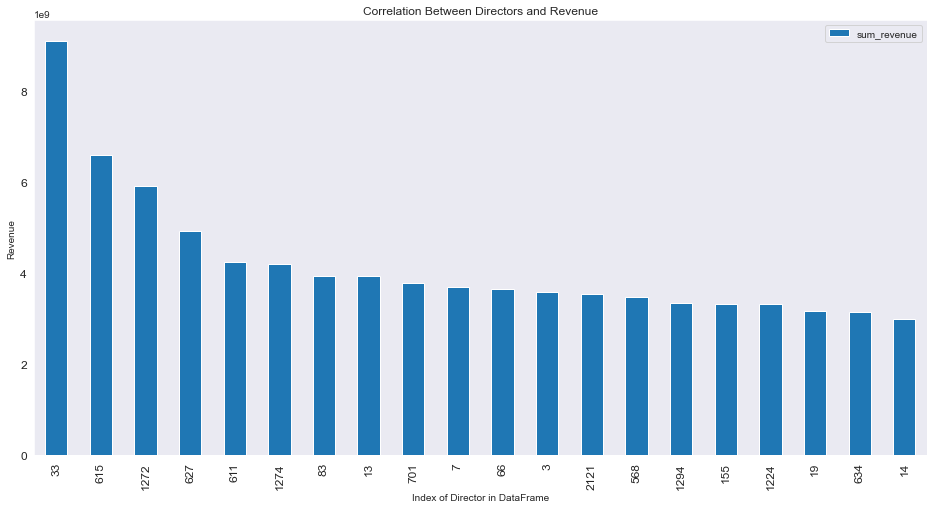

In [61]:
s20.plot(kind = "bar", figsize = (16, 8), fontsize = 12, title = "Correlation Between Directors and Revenue",
        xlabel = "Index of Director in DataFrame", ylabel = "Revenue");

<a id='conclusions'></a>
## Conclusions

In conclusion, the major factors that influence revenue are as follows:
> Budget: This is likely one of the most important factor (with a correlation of 0.705392687721313)

> Cast: Cast is another important factor that influences the revenue. More popular acstors tend to bring in more revenue

>Director: As with cast, poularity of the director is influential on the revenue


**Limitations:**
- There were plenty null values and that may have distrupted the cast analysis as they were filled with the mode of the `cast` column.
- Also, zero were a consideration in the `budget` and `revenue` columns. Those were filled with the mean of the respective columns.